<a href="https://colab.research.google.com/github/mcelster/mcelster.github.io/blob/main/Intro_to_Modeling_HackHer2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Modeling in Python

## Linear Regression on Diabetes Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

dia = load_diabetes(scaled = False)
df_dia = pd.DataFrame(dia.data, columns = dia.feature_names)
df_dia['target'] = dia.target
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [ ]:
print(dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<Axes: >

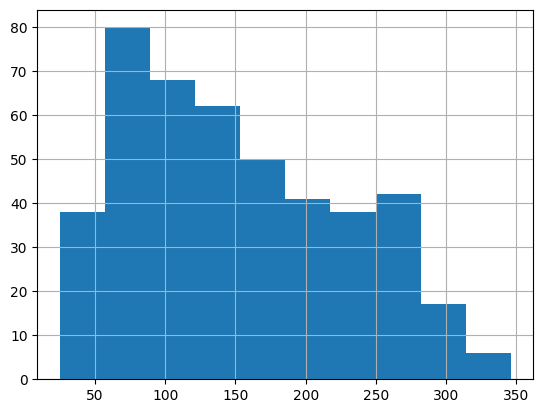

In [ ]:
# distribution of response variable
df_dia['target'].hist()

In [ ]:
from sklearn.model_selection import train_test_split

X_dia = dia.data
y_dia = dia.target

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size = 0.25, random_state = 42)

print(X_train_dia.shape, y_train_dia.shape, X_test_dia.shape, y_test_dia.shape)

(331, 10) (331,) (111, 10) (111,)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_dia, y_train_dia)

from sklearn.metrics import mean_squared_error
y_pred_lr = lin_reg.predict(X_test_dia)

mse = mean_squared_error(y_test_dia, y_pred_lr)

print(f'Mean squared error: {mse}')
print(f"Average amount predictions are off by: {np.sqrt(mse)}")

Mean squared error: 2848.3106508475066
Average amount predictions are off by: 53.36956671032197


In [ ]:
# interpret results -
# average change in outcome variable for one-unit change in input
# note: some randomness inherent to unseeded train/test split

for feature, coefficient in zip(df_dia.columns[:-1], lin_reg.coef_):
    print(f"Feature: {feature} Coefficient: {np.round(coefficient, 1)}")

Feature: age Coefficient: 0.2
Feature: sex Coefficient: -23.1
Feature: bmi Coefficient: 5.7
Feature: bp Coefficient: 1.3
Feature: s1 Coefficient: -1.3
Feature: s2 Coefficient: 0.8
Feature: s3 Coefficient: 0.4
Feature: s4 Coefficient: 9.9
Feature: s5 Coefficient: 63.4
Feature: s6 Coefficient: 0.1


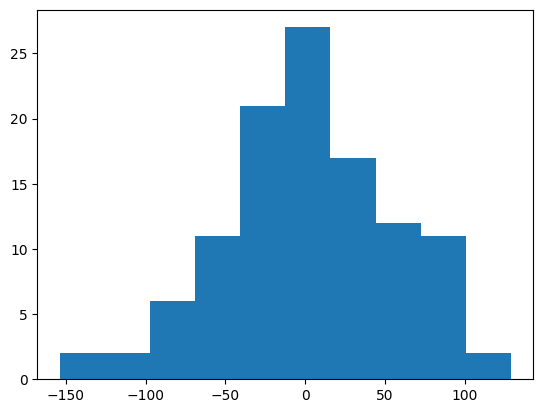

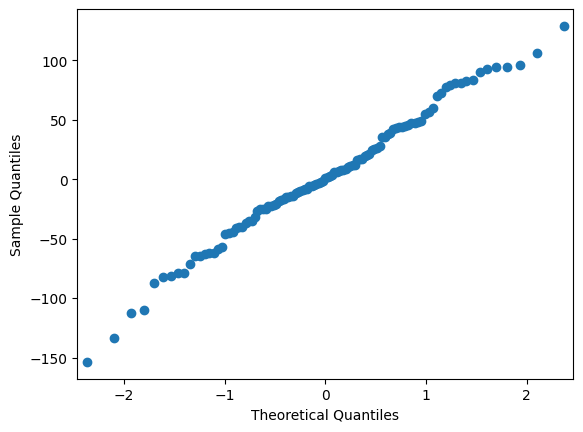

In [ ]:
# look at residuals (errors from truth)

import statsmodels.api as sm

# we want to see a bell-curve like shape
plt.hist(y_test_dia - y_pred_lr)

# compares observed distribution to normal distribution
sm.qqplot(y_test_dia - y_pred_lr)

plt.show()

## Logistic Regression on Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
df_bc = pd.DataFrame(bc.data, columns = bc.feature_names)
df_bc['target'] = bc.target
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X_bc = bc.data
y_bc = bc.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25)
print(X_train_bc.shape, y_train_bc.shape, X_test_bc.shape, y_test_bc.shape)

(426, 30) (426,) (143, 30) (143,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# unlike linear regression, fitting a logistic regression model has no
# closed form solution - numerical optimization algorithms are used instead
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg.fit(X_train_bc, y_train_bc)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy: ', log_reg.score(X_test_bc, y_test_bc), "\n")
y_pred_bc = log_reg.predict(X_test_bc)

print(confusion_matrix(y_test_bc, y_pred_bc))
print("\n")
print(classification_report(y_test_bc, y_pred_bc))

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_bc)
auc_log_reg = auc(fpr, tpr)
print(f"AUC: {auc_log_reg}")

Accuracy:  0.9790209790209791 

[[44  0]
 [ 3 96]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.97      0.98        99

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

AUC: 0.9848484848484849


## Decision Tree on Breast Cancer Dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dt.fit(X_train_bc, y_train_bc)
y_pred_dt = dt.predict(X_test_bc)
print('Accuracy: ', dt.score(X_test_bc, y_test_bc))

print(confusion_matrix(y_test_bc, y_pred_dt))
print("\n")
print(classification_report(y_test_bc, y_pred_dt))

fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_dt)
auc_dt = auc(fpr, tpr)
print(f"AUC: {auc_dt}")

Accuracy:  0.965034965034965
[[42  2]
 [ 3 96]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.98      0.97      0.97        99

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

AUC: 0.9621212121212122


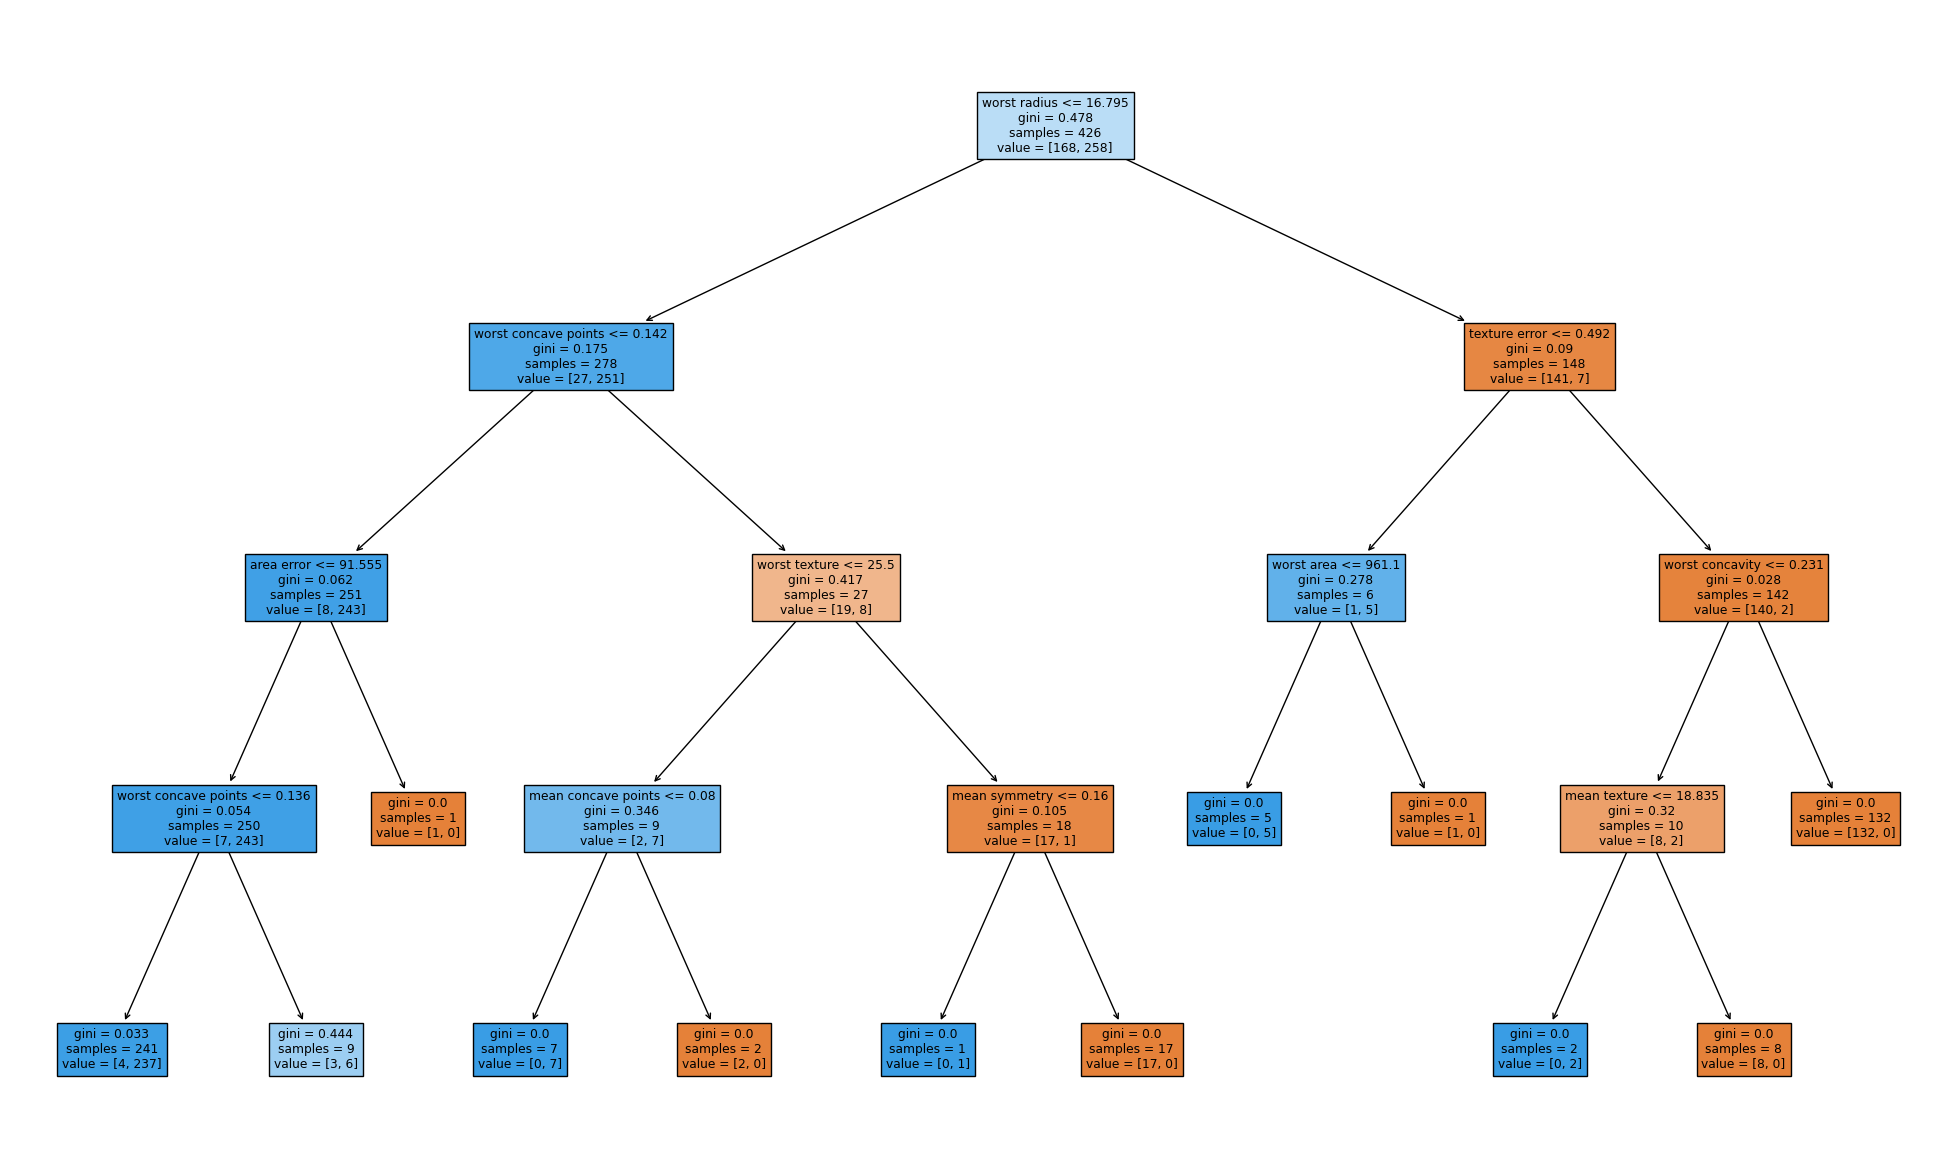

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(dt, feature_names = list(bc.feature_names),
                   filled=True)

## Random Forest on Diabetes Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_dia, y_train_dia)
y_pred_rf = rf.predict(X_test_dia)

# performance - what do you notice compared to the linear model?

print(f'Mean squared error: {mean_squared_error(y_test_dia, y_pred_rf)}')

Mean squared error: 3038.1088801801798


In [ ]:
# feature importance
for feature, importance in zip(df_dia.columns[:-1], rf.feature_importances_):
    print(f"Feature: {feature} Importance: {np.round(importance, 3)}")

Feature: age Importance: 0.063
Feature: sex Importance: 0.009
Feature: bmi Importance: 0.314
Feature: bp Importance: 0.101
Feature: s1 Importance: 0.056
Feature: s2 Importance: 0.049
Feature: s3 Importance: 0.059
Feature: s4 Importance: 0.027
Feature: s5 Importance: 0.257
Feature: s6 Importance: 0.064


In [ ]:
# how do the random forest feature importances compare to the magnitude of the coefficients of the linear model?

coef_df = pd.DataFrame({'feature': dia.feature_names,
                    'coef': np.abs(lin_reg.coef_)})
coef_df['rank'] = coef_df['coef'].rank(ascending = False)

imp_df = pd.DataFrame({'feature': dia.feature_names,
                    'imp': rf.feature_importances_})
imp_df['rank'] = imp_df['imp'].rank(ascending = False)

for feature in coef_df['feature'].values:
    print(f"Feature: {feature} LR rank: {coef_df[coef_df['feature'] == feature]['rank'].item()} RF rank: {imp_df[imp_df['feature'] == feature]['rank'].item()}")

Feature: age LR rank: 9.0 RF rank: 5.0
Feature: sex LR rank: 2.0 RF rank: 10.0
Feature: bmi LR rank: 4.0 RF rank: 1.0
Feature: bp LR rank: 5.0 RF rank: 3.0
Feature: s1 LR rank: 6.0 RF rank: 7.0
Feature: s2 LR rank: 7.0 RF rank: 8.0
Feature: s3 LR rank: 8.0 RF rank: 6.0
Feature: s4 LR rank: 3.0 RF rank: 9.0
Feature: s5 LR rank: 1.0 RF rank: 2.0
Feature: s6 LR rank: 10.0 RF rank: 4.0


## Challenge - Weather Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/') # link this notebook to your drive

In [ ]:
path = "gdrive/My Drive/Intro_to_Modeling_HackHer_2024/"

In [ ]:
# load data
city_attributes = pd.read_csv(path + 'city_attributes.csv')
humidity = pd.read_csv(path + 'humidity.csv')
pressure = pd.read_csv(path + 'pressure.csv')
temperature = pd.read_csv(path + 'temperature.csv')
weather_description = pd.read_csv(path + 'weather_description.csv')
wind_direction = pd.read_csv(path + 'wind_direction.csv')
wind_speed = pd.read_csv(path + 'wind_speed.csv')

# besides the first dataframe, the data look a lot like this:
humidity.head()

In [ ]:
# we can reshape these using pd.melt
# wide format -> long format
humidity = pd.melt(humidity, id_vars = ['datetime'], value_name = 'humidity', var_name = 'City')
pressure = pd.melt(pressure, id_vars = ['datetime'], value_name = 'pressure', var_name = 'City')
temperature = pd.melt(temperature, id_vars = ['datetime'], value_name = 'temperature', var_name = 'City')
weather_description = pd.melt(weather_description, id_vars = ['datetime'], value_name = 'weather_description', var_name = 'City')
wind_direction = pd.melt(wind_direction, id_vars = ['datetime'], value_name = 'wind_direction', var_name = 'City')
wind_speed = pd.melt(wind_speed, id_vars = ['datetime'], value_name = 'wind_speed', var_name = 'City')

humidity.head()

In [ ]:
# combine all of the dataframes created above
weather = pd.concat([humidity, pressure, temperature, weather_description, wind_direction, wind_speed], axis = 1)
weather = weather.loc[:,~weather.columns.duplicated()] # indexing: every row, only the columns that aren't duplicates
weather.head()

In [ ]:
# now we can merge this with the city attributes
weather = pd.merge(weather, city_attributes, on = 'City')
weather.head()

In [ ]:
# create a variable for binary classification
weather['weather_binary'] = np.where(weather['weather_description'].isin(["sky is clear", "broken clouds", "few clouds",
                                                  "scattered clouds", "overcast clouds"]), 'good', 'bad')

# create a variable for multi-classification
conditions = [
    (weather['weather_description'].isin(["drizzle", "freezing_rain", "heavy intensity drizzle",
                                          "heavy intensity rain", "heavy intensity shower rain",
                                          "light intensity drizzle", "light intensity drizzle rain",
                                          "light intensity shower rain", "light rain", "light shower rain",
                                          "moderate rain", "proximity moderate rain", "ragged shower rain",
                                          "shower drizzle", "very heavy rain", "proximity shower rain"])),
    (weather['weather_description'].isin(["broken clouds", "overcast clouds", "scattered clouds", "few clouds"])),
    (weather['weather_description'].isin(["heavy snow", "light rain and snow", "light shower sleet", "light snow",
                                          "rain and snow", "shower snow", "sleet", "snow", "heavy shower snow"])),
    (weather['weather_description'].isin(["thunderstorm with drizzle", "thunderstorm with heavy drizzle",
                                          "thunderstorm with light drizzle", "thunderstorm with rain",
                                          "thunderstorm with light rain", "heavy thunderstorm",
                                          "proximity thunderstorm", "proximity thunderstorm with drizzle",
                                          "proximity thunderstorm with rain", "proximity thunderstorm",
                                          "thunderstorm", "ragged thunderstorm"])),
    (weather['weather_description'].isin(["sky is clear"]))]

choices = ['rain', 'cloudy', 'snow', 'thunder', 'clear']
weather['weather_broad'] = np.select(conditions, choices, default='other')

# most sklearn models won't work with NaN values. there are a whole suite of imputation techniques used to replace empty
# values with the most appropriate estimate, but for the sake of these challenges, we'll just remove these cases.

weather = weather.dropna()
weather.head()

### Classification

**Exercise 1**

Fit a classification model of your choice to predict `weather_binary`, and interpret its confusion matrix when applied to held-out testing data. How would you judge the model's performance? Justify your answer.

**Exercise 2**

Fit a classification model of your choice to predict `weather_broad`. Explain the model's performance, and how your interpretation of its confusion matrix changes in a multi-class scenario.  

### Regression

For the following exercises, choose a continuous variable of interest in the dataset (for example, `temperature`).

**Exercise 3**

For your variable of choice, fit a linear regression model using only the single variable that best explains it (how could you figure this out from the data at hand?). Perform any necessary diagnostics or analysis required to make a conclusion about its interpretation and performance. How does this change if more variables are added? Why do you think that is?

**Exercise 4**

Try picking a different variable than the one selected before, and use a regression method of your choice to predict it. What is the MSE on test data, and how do you interpret it?

### Conclusion

In these exercises, we practiced techniques introduced in the lecture portion of the workshop.

**Exercise 5**

Can you imagine any other ways in which modeling the weather could be helpful, and potential targets to predict given the dataset at hand? If you could have additional or different data to help in this task, what would you choose? Given the models created during this workshop, how would you recommend they be applied to a real-world problem?